In [1]:
# Import libraries for the assignment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.neural_network import MLPClassifier


In [2]:
# Load dataset

stroke_data = pd.read_csv('./brain_stroke.csv')
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
stroke_data.isna().sum() # checking for missing values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
stroke_data.dtypes # checking variable types for anything unexpected

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
stroke_data['stroke'].value_counts() # seeing how skewed target values may be

0    4733
1     248
Name: stroke, dtype: int64

In [6]:
ohe = OneHotEncoder()
cat_array = ohe.fit_transform(stroke_data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()

In [7]:
cat_features = pd.DataFrame(cat_array, columns = ['Female','Male', 'No','Yes',
                           'Govt_job', 'Private', 'Self-employed', 'children', 'Rural', 'Urban',
                           'Unknown', 'formerly smoked', 'never smoked', 'smokes'])

In [8]:
ohe_data = pd.concat([stroke_data.iloc[:, 1:4],
           stroke_data.iloc[:, 7:9],
           cat_features,
           stroke_data.iloc[:, 10]], axis=1)

ohe_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,stroke
0,67.0,0,1,228.69,36.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,80.0,0,1,105.92,32.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,49.0,0,0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,79.0,1,0,174.12,24.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,81.0,0,0,186.21,29.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4977,40.0,0,0,191.15,31.1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4978,45.0,1,0,95.02,31.8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4979,40.0,0,0,83.94,30.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [9]:
# Separate target values
X = ohe_data.iloc[:, :-1]
y = ohe_data.loc[:, 'stroke']

# Create data split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y) #stratify bc saw target data skewed

In [10]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train', np.bincount(y_train))
print('Labels count in y_test',np.bincount(y_test))

Labels count in y: [4733  248]
Labels count in y_train [3786  198]
Labels count in y_test [947  50]


# KNN

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
#knn = KNeighborsClassifier(n_neighbors = 5, 
#                          p=2,
#                          metric = 'minkowski')

In [25]:
#pipe_knn = make_pipeline(StandardScaler(),
#                        KNeighborsClassifier(metric = 'minkowski'))

knn = KNeighborsClassifier(metric='minkowski')

search_space = {
    'n_neighbors' : [3, 5, 8, 10, 12, 15],
    'p' : [1, 2]
}

GS = GridSearchCV(estimator = knn,
                 param_grid = search_space,
                 scoring = 'accuracy',
                 refit = True,
                 cv = 5,
                 n_jobs = -1,
                 verbose = 3)

gs = GS.fit(X_train_std, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.9510542045232435
{'n_neighbors': 8, 'p': 2}


In [26]:
clf = gs.best_estimator_

y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


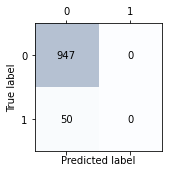

In [27]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

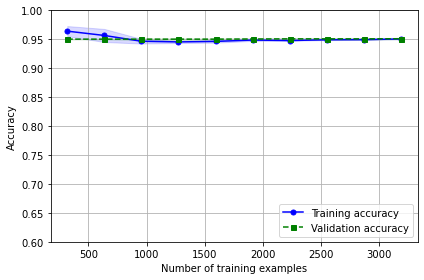

In [28]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()

plt.show()

## SVM

In [ ]:
#svm = SVC(kernel='linear', C=1.0, random_state=1)
#svm.fit(X_train_std, y_train)
#y_pred = svm.predict(X_test_std)
#print("Number of misclassified examples among total %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
#print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

In [ ]:
#pipe_svc = make_pipeline(StandardScaler(),
#                        PCA(n_components=2),
#                        SVC(kernel='rbf', random_state=1))

#pipe_svc.fit(X_train, y_train)
#y_pred = pipe_svc.predict(X_test)
#print(f'Test Accuracy: {pipe_svc.score(X_test, y_test)}')

In [22]:
pipe_svc = make_pipeline(StandardScaler(),
                         #SelectPercentile(chi2, percentile=50),
                         SVC(random_state=1))

param_range = [0.01, 0.1, 1.0, 10.0]

param_grid = {'svc__C': param_range, 
              'svc__kernel': ['linear', 'rbf'],
              'svc__gamma': param_range}

GS = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)

gs = GS.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.950552322465527
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


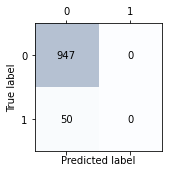

In [23]:
clf = gs.best_estimator_

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

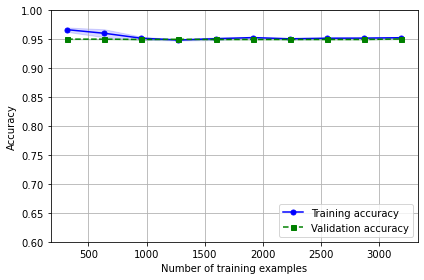

In [24]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()

plt.show()

## Decision Tree

In [12]:
#pipe_dtc = make_pipeline(StandardScaler(),
#                         SVC(random_state=1))

search_space = {'max_depth': [3, 4, 5, 6],
               'criterion' : ['gini', 'entropy']}

GS = GridSearchCV(estimator=DecisionTreeClassifier(), 
                  param_grid=search_space, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = GS.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9500510069142706
{'criterion': 'entropy', 'max_depth': 3}


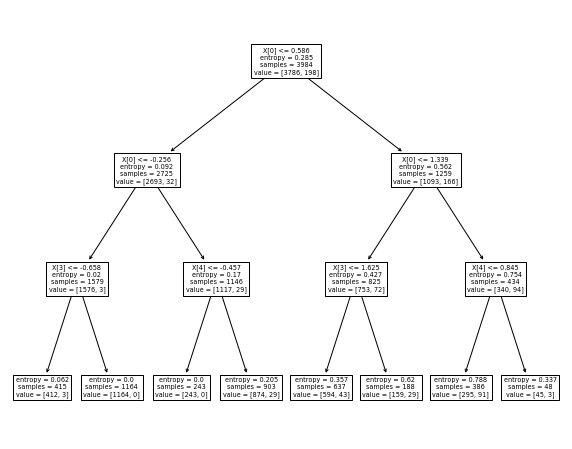

In [13]:
plt.figure(figsize=(10,8))
plot_tree(gs.best_estimator_)
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


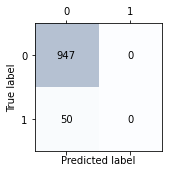

In [14]:
clf = gs.best_estimator_

y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

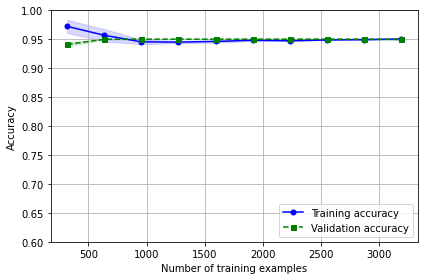

In [15]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()

plt.show()

# Boosted

In [16]:
boost = GradientBoostingClassifier()

#boost.fit(X_train_std, y_train)

search_space = {'n_estimators': [50, 100, 150, 200]}

GS = GridSearchCV(estimator=boost, 
                  param_grid=search_space, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = GS.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9495491240664474
{'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.25      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.60      0.51      0.51       997
weighted avg       0.92      0.95      0.93       997



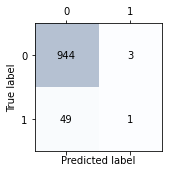

In [17]:
clf = gs.best_estimator_

y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

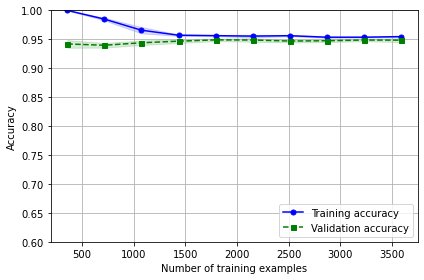

In [18]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()

plt.show()

# Neural Network

In [19]:
search_space = {'hidden_layer_sizes' : [[5,5,5],[10,10,10],[5,5,5,5],[10,10,10,10]],
               'max_iter' : [200, 500, 700]}

GS = GridSearchCV(estimator=MLPClassifier(), 
                  param_grid=search_space, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)

gs = GS.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9503013814366689
{'hidden_layer_sizes': [5, 5, 5], 'max_iter': 500}


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tclav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


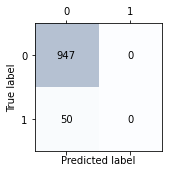

In [20]:
clf = gs.best_estimator_

y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

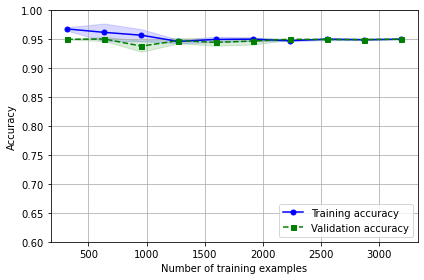

In [21]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()

plt.show()